In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

## 1. Dataset Read

In [2]:
df = pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 2. Basic Analysis

In [3]:
print("No. of features are in given dataset : {} \n".format(len(df.columns[:-1])))

print("Features are : {} \n".format(list(df.columns)[:-1]))

print("Target Feature is : {}".format(df.columns[-1]))

No. of features are in given dataset : 3 

Features are : ['age', 'year', 'nodes'] 

Target Feature is : status


In [4]:
df.info() # Note: No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.describe() # basic stats about df

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
# !pip install statsmodels

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(df["nodes"]))
#Median with an outlier
print(np.median(np.append(df["age"],50)));
print(np.median(df["year"]))


print("\nQuantiles:")
print(np.percentile(df["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df["age"],np.arange(0, 100, 25)))
print(np.percentile(df["year"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df["nodes"],90))
print(np.percentile(df["age"],90))
print(np.percentile(df["year"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df["nodes"]))
print(robust.mad(df["age"]))
print(robust.mad(df["year"]))



Medians:
1.0
52.0
63.0

Quantiles:
[0. 0. 1. 4.]
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]

90th Percentiles:
13.0
67.0
67.0

Median Absolute Deviation
1.482602218505602
11.860817748044816
4.447806655516806


In [7]:
print("No of datapoint is in each feature : {} \n".format(df.size / 4))

print("No of classes and datapoint is in dataset :\n{}\n".format(df.status.value_counts()))

No of datapoint is in each feature : 306.0 

No of classes and datapoint is in dataset :
1    225
2     81
Name: status, dtype: int64



## 3. Insights of cancer patients survival rate of haberman hospital before/after surgery

/home/vijay/.conda/envs/pose/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

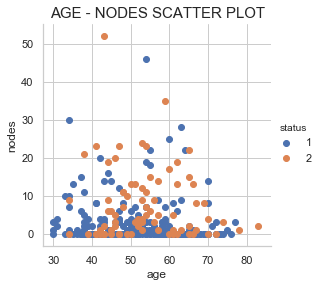

In [8]:
plt.figure(figsize=(15,8));
sns.set(style='whitegrid');
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 50

sns.FacetGrid(df, hue='status', size=4) \
.map(plt.scatter, 'age', 'nodes') \
.add_legend();

plt.title("AGE - NODES SCATTER PLOT");

plt.show();

`Observation :`
    1. Features are tightly merged with each other
    2. Higher lyph nodes causes higher risks 
    

### 3.1 Multivariate Analysis

/home/vijay/.conda/envs/pose/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/vijay/.conda/envs/pose/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


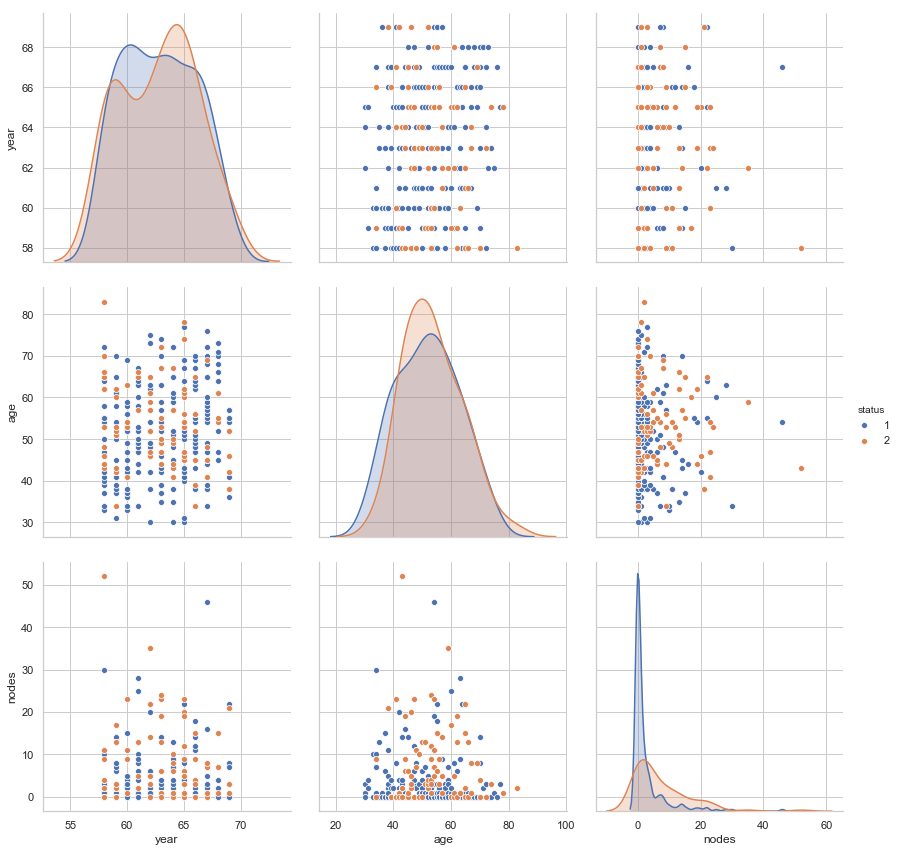

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=4, vars=['year','age', 'nodes'], diag_kind='kde', kind='scatter');
plt.show()


`observation : `

    1. All features are tightly overlapped
    2. aged peoples with higher lyph nodes is having higher possibility of survival risk

### 3.2 Univariate Analysis

#### Histogram, CDF, PDF

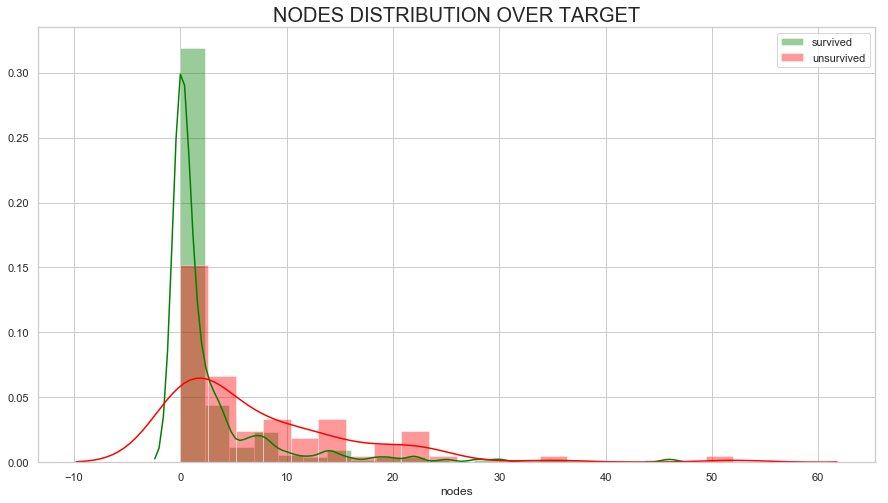

In [10]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,8))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

sns.distplot(df.loc[df['status'] == 1].nodes , bins=20, label='survived', color='Green');
sns.distplot(df.loc[df['status'] == 2].nodes , bins=20, label='unsurvived', color='Red');
plt.legend();
plt.title("NODES DISTRIBUTION OVER TARGET");

`observation :`

    1. The person who has nodes > 10, is having higher survival risk;
    2. if the person who has  < 10, is having low survival risk

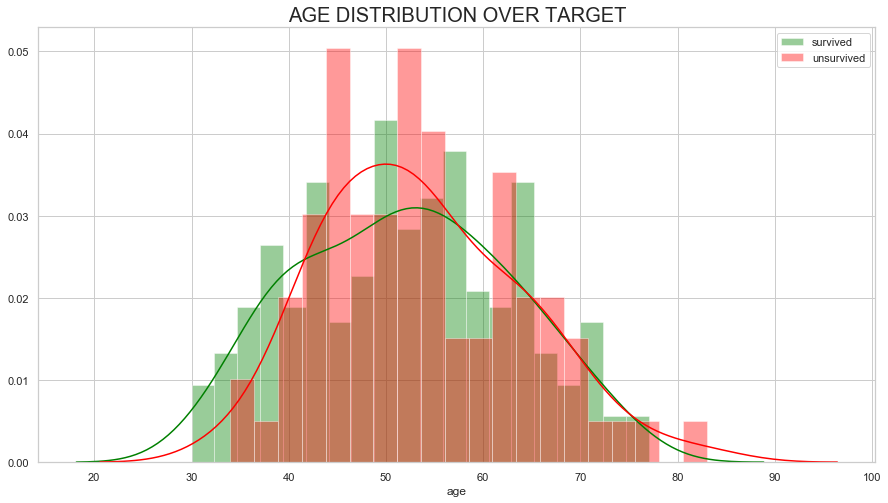

In [11]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,8))

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

sns.distplot(df.loc[df['status'] == 1].age , bins=20, label='survived', color='Green');
sns.distplot(df.loc[df['status'] == 2].age , bins=20, label='unsurvived', color='Red');
plt.legend();
plt.title("AGE DISTRIBUTION OVER TARGET");

`observation : `

    1. people whose age lies between 42-55, they slightly have higher survival risk possibility;

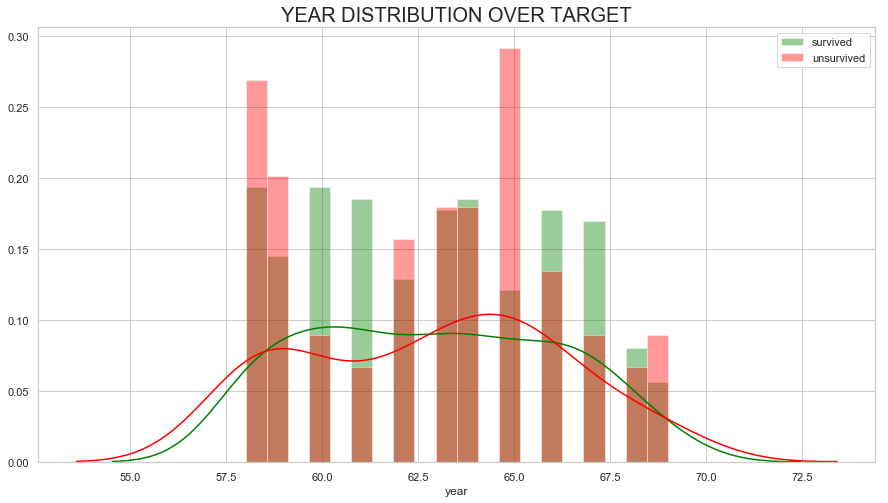

In [12]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,8))

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

sns.distplot(df.loc[df['status'] == 1].year , bins=20, label='survived', color='Green')
sns.distplot(df.loc[df['status'] == 2].year , bins=20, label='unsurvived', color='Red')
plt.legend()
plt.title("YEAR DISTRIBUTION OVER TARGET");

`observation : `

    1. patient who had surgery inbetween [1958 - mid of 1963] and [1966 - 1968] years had highly survived;
    2. patient who had surgery inbetween [1963 - 1966] years had higher survival risk.

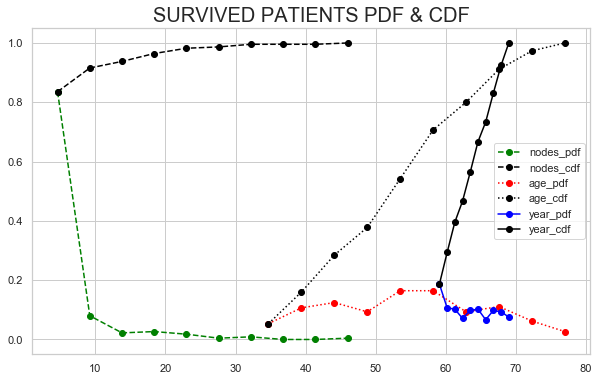

In [13]:
sns.set_style("whitegrid");
plt.figure(figsize=(10,6))

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

count, bin_edges = np.histogram(df.loc[df['status'] == 1].nodes, bins=10, density=True)
nodes_pdf = count / sum(count)
nodes_cdf = np.cumsum(nodes_pdf)
plt.plot(bin_edges[1:],nodes_pdf, color='green', marker='o', linestyle='dashed')
plt.plot(bin_edges[1:],nodes_cdf, color='black', marker='o', linestyle='dashed')

count, bin_edges = np.histogram(df.loc[df['status'] == 1].age, bins=10, density=True)
age_pdf = count / sum(count)
age_cdf = np.cumsum(age_pdf)
plt.plot(bin_edges[1:],age_pdf, color='red', marker='o', linestyle='dotted')
plt.plot(bin_edges[1:],age_cdf, color='black', marker='o', linestyle='dotted')

count, bin_edges = np.histogram(df.loc[df['status'] == 1].year, bins=10, density=True)
year_pdf = count / sum(count)
year_cdf = np.cumsum(year_pdf)
plt.plot(bin_edges[1:],year_pdf, color='blue', marker='o', linestyle='solid')
plt.plot(bin_edges[1:],year_cdf, color='black', marker='o', linestyle='solid')

plt.title("SURVIVED PATIENTS PDF & CDF")

plt.legend(["nodes_pdf","nodes_cdf", "age_pdf", "age_cdf", "year_pdf", "year_cdf"])

plt.show();

`observation : `

    1. if nodes < 10, 82% patient survived, else: 10% chances of survival
    2. if age 45-65, 18% patient survived, than among other patients;
     

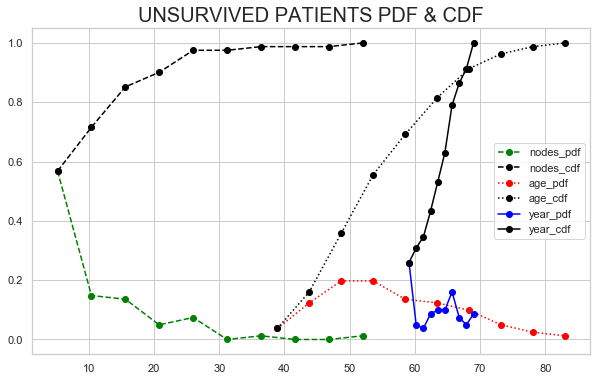

In [14]:
sns.set_style("whitegrid");
plt.figure(figsize=(10,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

count, bin_edges = np.histogram(df.loc[df['status'] == 2].nodes, bins=10, density=True)
nodes_pdf = count / sum(count)
nodes_cdf = np.cumsum(nodes_pdf)
plt.plot(bin_edges[1:],nodes_pdf, color='green', marker='o', linestyle='dashed')
plt.plot(bin_edges[1:],nodes_cdf, color='black', marker='o', linestyle='dashed')

count, bin_edges = np.histogram(df.loc[df['status'] == 2].age, bins=10, density=True)
age_pdf = count / sum(count)
age_cdf = np.cumsum(age_pdf)
plt.plot(bin_edges[1:],age_pdf, color='red', marker='o', linestyle='dotted')
plt.plot(bin_edges[1:],age_cdf, color='black', marker='o', linestyle='dotted')

count, bin_edges = np.histogram(df.loc[df['status'] == 2].year, bins=10, density=True)
year_pdf = count / sum(count)
year_cdf = np.cumsum(year_pdf)
plt.plot(bin_edges[1:],year_pdf, color='blue', marker='o', linestyle='solid')
plt.plot(bin_edges[1:],year_cdf, color='black', marker='o', linestyle='solid')

plt.title("UNSURVIVED PATIENTS PDF & CDF")

plt.legend(["nodes_pdf","nodes_cdf", "age_pdf", "age_cdf", "year_pdf", "year_cdf"])

plt.show();

`observation : `

    1. nodes > 20, 97% of unsurvived rate.
    2. age inbetween 38 - 48 has 20% of unsurvived rate.

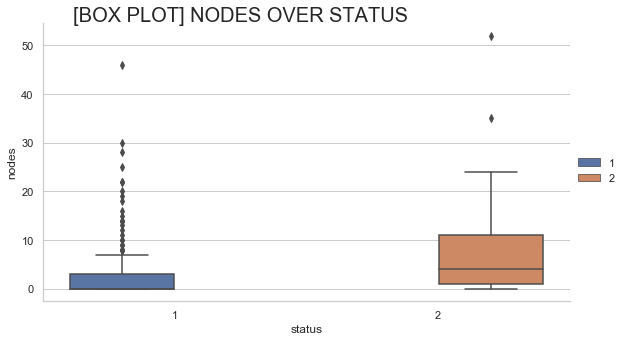

In [15]:
sns.set_style("whitegrid");

g = sns.catplot(x="status", y="nodes", hue="status", data=df, kind="box", height=4, aspect=.7)

g.fig.set_figwidth(10)
g.fig.set_figheight(5)
g.fig.suptitle('[BOX PLOT] NODES OVER STATUS', fontsize=20)
g.add_legend()
plt.show()


`observation :`

    1. 75 percentile of patient who has survived had lyph node less than 5.
    2. Threshold for unsurvival is 25 percentile, 75 percentile is 12, 25 percentile is 2

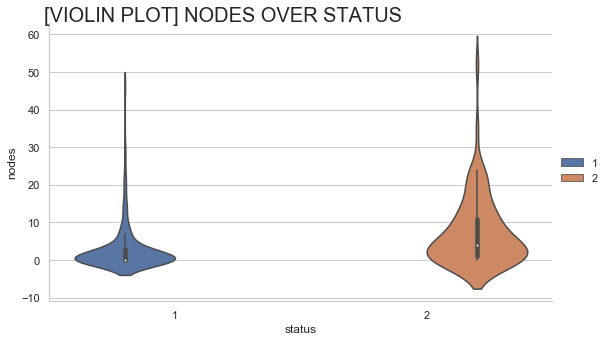

In [16]:
sns.set_style("whitegrid");

g = sns.catplot(x="status", y="nodes", hue="status", data=df, kind="violin", height=4, aspect=.7);

g.fig.set_figwidth(10)
g.fig.set_figheight(5)
g.add_legend()
g.fig.suptitle('[VIOLIN PLOT] NODES OVER STATUS', fontsize=20)
plt.show()

`observation : `

    1. plot 1 clearly is showing lymph nodes closer to zero has highely survived, whiskers also 0-7.
    2. plot 2 is showing lymph nodes far away from zero has highly unsurvived, whiskers 0-20 has threshold 0-12 short survival chance.

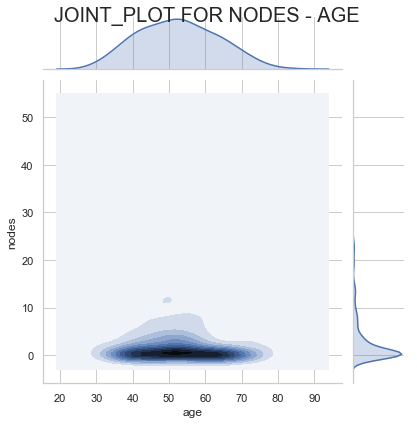

In [17]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 10

sns.jointplot(x='age',y='nodes',data=df,kind='kde')

plt.suptitle("JOINT_PLOT FOR NODES - AGE",fontsize=20)

plt.show()

`observation : `

    1.  long survival is more from age range 47–60 and axillary nodes from 0–3.

### 3.3 BAR_PLOTS [SUMMARIZATION]

<Figure size 1080x576 with 0 Axes>

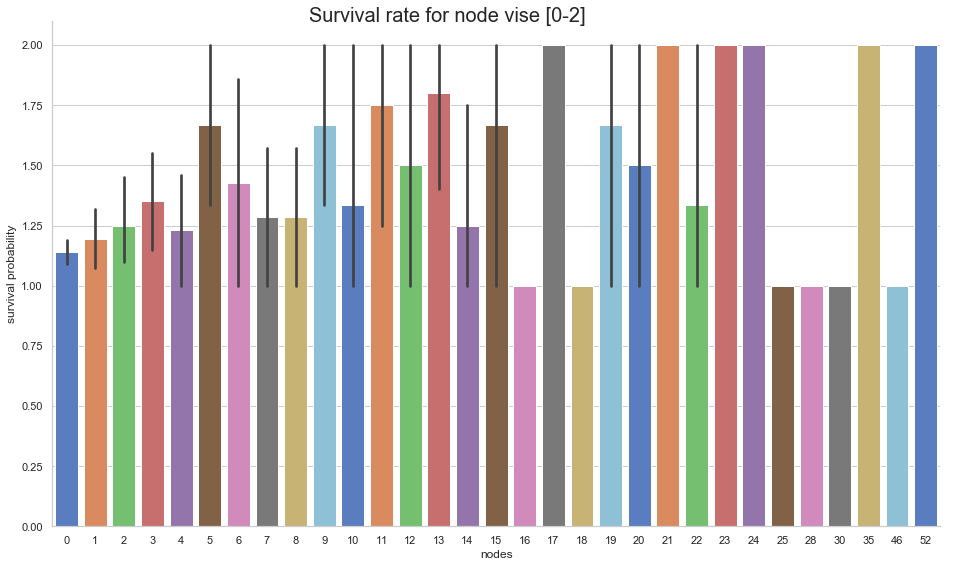

In [18]:
plt.figure(figsize=(15,8));

sns.set(style="whitegrid");
# sns.FacetGrid(df, hue='status')

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="nodes", y="status", data=df,
                height=6, kind="bar", palette="muted");

# g.despine(left=True)
g.set_ylabels("survival probability");

g.fig.set_figwidth(15);
g.fig.set_figheight(8.27);
g.fig.suptitle("Survival rate for node vise [0-2]", fontsize=20);

<Figure size 1080x576 with 0 Axes>

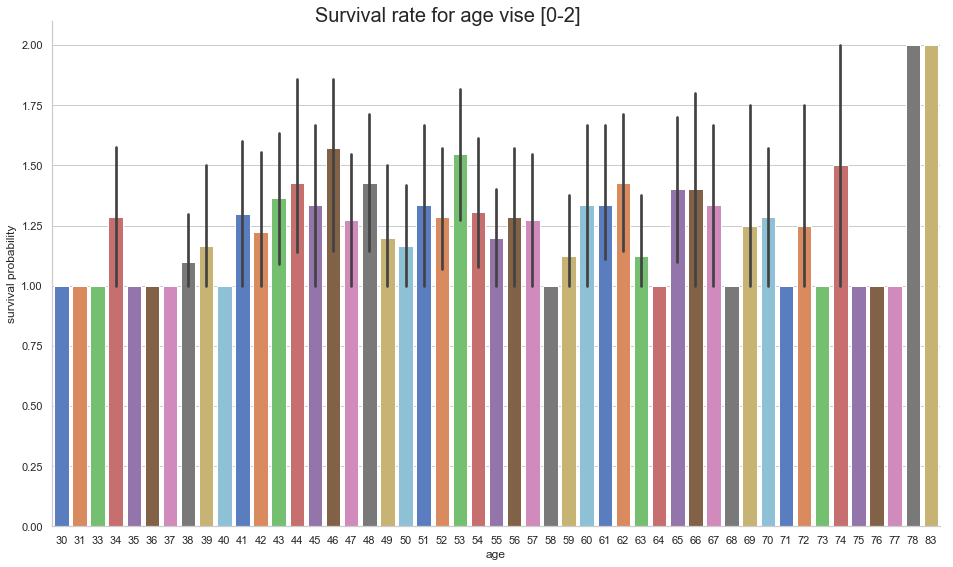

In [19]:
plt.figure(figsize=(15,8))

sns.set(style="whitegrid");

g = sns.catplot(x="age", y="status", data=df,
                height=6, kind="bar", palette="muted");

g.set_ylabels("survival probability");

g.fig.set_figwidth(15)
g.fig.set_figheight(8.27)

g.fig.suptitle("Survival rate for age vise [0-2]", fontsize=20);

## 4. Conclusion :


`1. Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.`

`2. Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.`

`3. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.`